In [88]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [89]:
file_path = "data/Life Expectancy Data.csv"
df_life_exp = pd.read_csv(file_path)

In [90]:
df_life_exp.info()
df_life_exp.head()
df_life_exp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### The column names are all wrong. Let's try fixing that.

In [91]:
new_col_names = {}
for col_name in df_life_exp.columns:
    # Strip the name from extra white space and switch to lower case
    new_col_names[col_name] = col_name.strip().lower()
    # Display the change in name
    print("'"+col_name+"'", '->', "'"+new_col_names[col_name]+"'")
# Rename the columns into a new data frame
df_life_exp_renamed = df_life_exp.rename(columns=new_col_names)

'Country' -> 'country'
'Year' -> 'year'
'Status' -> 'status'
'Life expectancy ' -> 'life expectancy'
'Adult Mortality' -> 'adult mortality'
'infant deaths' -> 'infant deaths'
'Alcohol' -> 'alcohol'
'percentage expenditure' -> 'percentage expenditure'
'Hepatitis B' -> 'hepatitis b'
'Measles ' -> 'measles'
' BMI ' -> 'bmi'
'under-five deaths ' -> 'under-five deaths'
'Polio' -> 'polio'
'Total expenditure' -> 'total expenditure'
'Diphtheria ' -> 'diphtheria'
' HIV/AIDS' -> 'hiv/aids'
'GDP' -> 'gdp'
'Population' -> 'population'
' thinness  1-19 years' -> 'thinness  1-19 years'
' thinness 5-9 years' -> 'thinness 5-9 years'
'Income composition of resources' -> 'income composition of resources'
'Schooling' -> 'schooling'


### There are some missing data points, so let's explore how much of the data is missing.

In [92]:
# Calculate percentage of missing data
percent_missing = df_life_exp_renamed.isna().sum() * 100 / len(df_life_exp_renamed)
data = zip(df_life_exp_renamed.columns, percent_missing, df_life_exp_renamed.dtypes)
# Create data frame with missing data numbers
df_missing = pd.DataFrame(data=data, columns=['column name', '% missing', 'dtype'])
# Check columns with missing data
df_missing = df_missing[df_missing['% missing'] > 0]
df_missing

,column name,% missing,dtype
3,life expectancy,0.340368,float64
4,adult mortality,0.340368,float64
6,alcohol,6.603131,float64
8,hepatitis b,18.822328,float64
10,bmi,1.157250,float64
12,polio,0.646698,float64
13,total expenditure,7.692308,float64
14,diphtheria,0.646698,float64
16,gdp,15.248468,float64
17,population,22.191967,float64


### TODO: Remove outliers

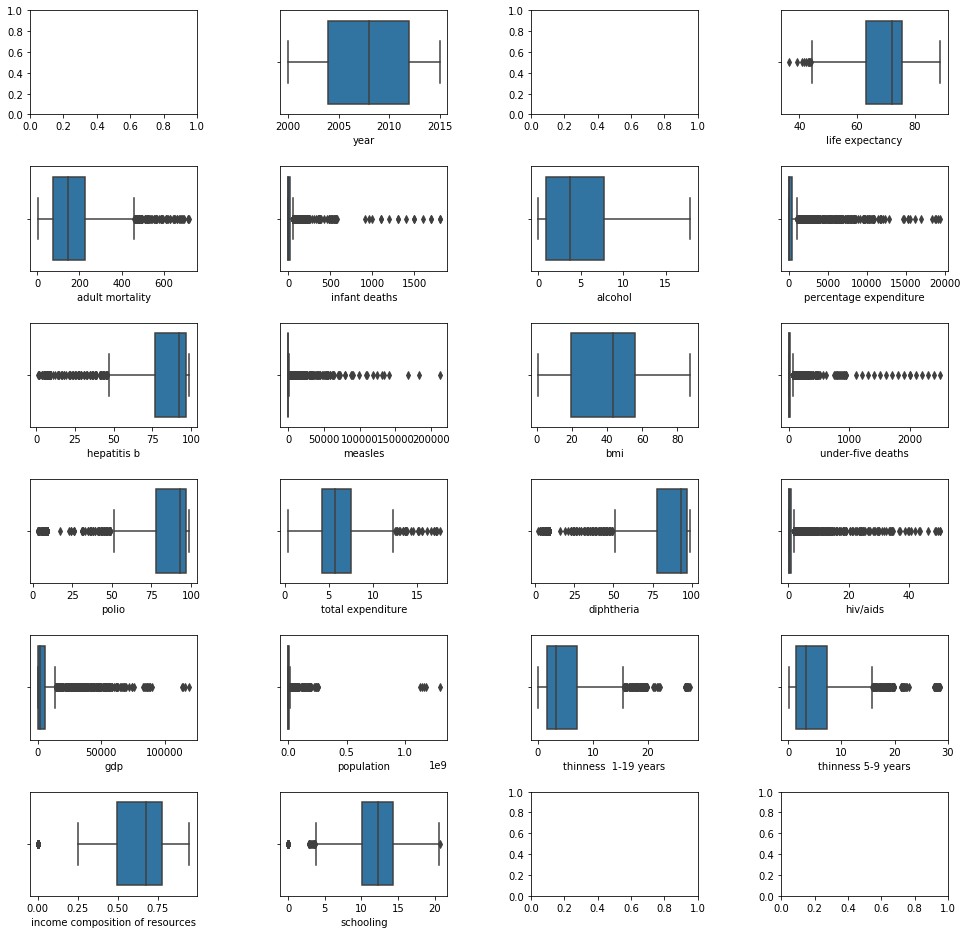

In [93]:
def plot(df, plotting_func, n_cols=4, n_rows=None, figsize=(15, 15)):
    assert n_cols is None or n_rows is None, 'Either n_cols or n_rows has to be a derived value. Do not give both'
    assert (not n_cols is None) or (not n_rows is None), 'Either n_cols or n_rows has to be a given value. Do not give both'
    # Get columns
    columns = df.columns
    # Derive the other dimension
    if n_rows != None:
        n_cols = math.ceil(len(columns) / n_rows)
    else:
        n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for row in range(n_rows):    
        for col in range(n_cols):
            index = row * n_cols + col
            if index >= len(columns):
                break
            # Skip columns with non-numeric values
            if not pd.api.types.is_numeric_dtype(df[columns[index]]):
                continue
            plotting_func(df[columns[index]], ax=axes[row, col])
    plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
# Check the distribution of the columns
plot(df_life_exp_renamed, sns.boxplot, 4)

### Knowing that there's lots of missing data, we need to impute the missing data as follows:
1. Check the distribution of the missing columns.
1. Impute the missing values with a function that's appropriate to the distribution.

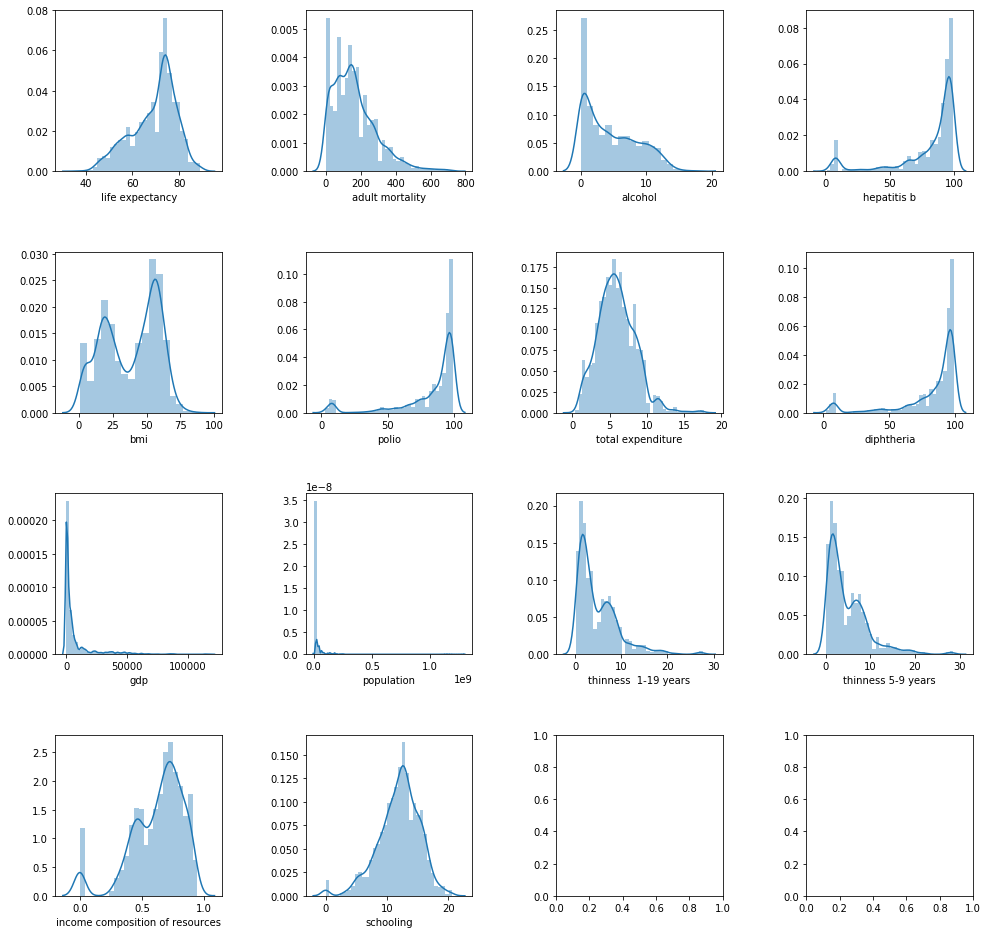

In [94]:
plot(df_life_exp_renamed[df_missing['column name']], sns.distplot, 4)

In [ ]:
# We need to impute the missing data
def impute(df, columns, strategy='mean', missing_values=np.nan):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    columns_mask = np.array(df.columns) == np.array(columns)
    df.iloc[:,columns_mask] = imputer.fit_transform(df[columns])
# TODO: Impute columns that are skewed
# TODO: Impute columns that are centered around the mean

In [95]:
# Let's take a look at the correlation matrix
# def plot_correlation_matrix(df, title=None):
#     # Computer correlation matrix
#     corr = df.corr() * 100
#     # Generate mask for the upper triangle
#     mask = np.triu(np.ones_like(corr, dtype=bool))
#     # Set up figure
#     f, ax = plt.subplots(figsize=(16,16))
#     # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
#     # Draw the heatmap with the mask and corrent aspect ratio
#     sns.heatmap(corr, mask=mask, center=0.0, cmap=cmap, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)
#     if title:
#         plt.title(title)


# plot_correlation_matrix(df_life_exp_imputed, 'Feature correlation %')

## Seeing the correlation matrix, one can confirm some intuitive insights between some features like:
- Adult Mortality and LifeExpectancy are negatively correlated.
- infant deaths and under-five deaths (correlation is 100%) so we may even drop one of the two columns.
- 5-9 years thinness and 1-19 years thinness.
----
## There are some new insights based on positive relations like:
- Percentage of expenditure and GPD are positively correlated.
- Schooling and income composition of resources are positively correlated.
- Schooling and life expectancy are positively correlated.
- Most diseases do not greatly affect mortality rates except for HIV/AIDs